## Boosting Model on Titanic Dataset
#
#### We try to predict with a Adaboost model if the passenger of the Titanic boat will survive or not

This Adaboost model will have only have **Decision Trees**

In [15]:
# DATA MANIPULATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DATA VIUALIZING
import seaborn as sns

# DATA SPLITING
from sklearn.model_selection import train_test_split

# WEAK LEARNER
from sklearn.tree import DecisionTreeClassifier

# ENSEMBLE LEARNER
from sklearn.ensemble import AdaBoostClassifier

# METRICS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 1. Load and Prepare Data

In [16]:
df = pd.read_csv('train.csv', header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [20]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

* IL n'y a pas de déséquilibre apparent entre les différentes classes

In [21]:
new_df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
new_df['Age'].fillna(int(df['Age'].mean()), inplace=True)
new_df['Sex'] = new_df['Sex'].apply(lambda x : ['male', 'female'].index(x))
new_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = pd.get_dummies(new_df['Embarked'], dtype=int)
new_df = new_df.drop(['Embarked'], axis=1)
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,29.0,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(new_df.loc[:,new_df.columns!='Survived'], new_df['Survived'], test_size=0.2)

In [23]:
y_train.value_counts()

Survived
0    437
1    275
Name: count, dtype: int64

Classes are slighty unbalanced here.

### 2. Initialize a Decision Tree Base Estimator (Weak Learner)

In [24]:
base_estimator = DecisionTreeClassifier()

### 3. Evaluate Base Learners

In [25]:
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=10,learning_rate=1)

In [26]:
adaboost.fit(X_train, y_train)

c:\Users\Gael\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=10)

In [27]:
def conf_matrix(y_test, y_pred, predictor='Adaboost', labels = [0, 1]):

    conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
    plt.figure(figsize=(4,3), dpi=100)
    sns.set(font_scale=1)

    ax = sns.heatmap(conf_matrix, annot=True, fmt='d')
    ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Died', 'Survived'])

    ax.set_ylabel("Truth", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Died', 'Survived'])

    ax.set_title(f"Confusion Matrix for {predictor}")

    plt.show()

Accuracy: 75.41899441340783


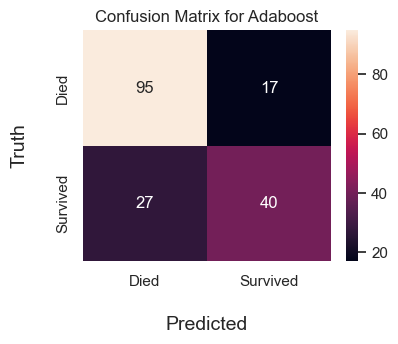

In [28]:
y_pred = adaboost.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}')
conf_matrix(y_test, y_pred)